<a href="https://colab.research.google.com/github/gabrielluizone/Statistical-Report/blob/main/Regression_Analysis_Statistical_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Analysis

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm # Análise de Regressão Simples
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [90]:
# DataFrame para Análise
df = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Statistical-Report/main/data/new_covid_Regiao_5.csv')
df.dropna(inplace=True) # Removendo os valores NaN
df = df.reset_index(drop=1) # Resetando o Index
df['distrito'] = df['distrito'].apply(lambda x: 1 if x == 'VILA CURUCA' else\
                                                2 if x == 'VILA FORMOSA' else\
                                                3 if x == 'VILA GUILHERME' else\
                                                4 if x == 'VILA JACUI' else 5) # Convertendo os distritos em Valore

# DataFrame para Backup dos dados Originais, com valores NaN
rw = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Statistical-Report/main/data/new_covid_Regiao_5.csv')

In [91]:
display(rw.sample(3))
df.sample(3)

,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
1782,1,41.0,NaN,1.0,NaN,NaN,1.0,3.0,NaN,0,VILA FORMOSA,0.212
727,1,76.0,1.0,1.0,NaN,NaN,2.0,2.0,2.0,1,VILA CURUCA,0.408
926,1,78.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0,VILA CURUCA,0.334


,sexo,idade,cardiopati,diabetes,renal,obesidade,uti,suportvent,evolucao,covid,distrito,ivs
489,0,80.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,0,3,0.255
390,0,63.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1,2,0.313
453,0,55.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1,2,0.240


### Análise de Correlação entre Variáveis
> **Resultado:** Existe uma correlação moderada (entre $0.40$ a $0.69$) entre o tipo de obesidade, tipos de cardiopatia, doença renal e os tipos de diabetes. Isso será relevante para o estudo de regressão. As demais possuem uma relação fraca e não relevante para a análise

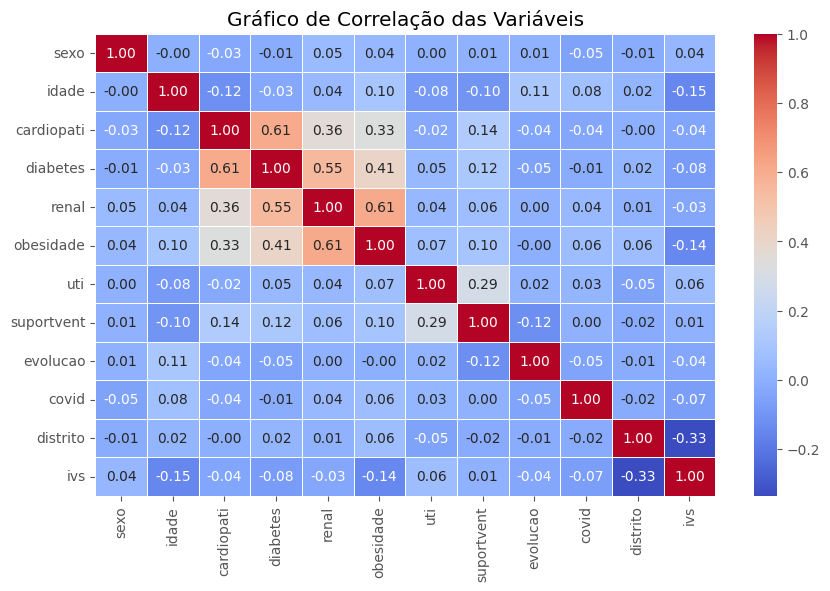

In [92]:
# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Cria um mapa de calor (heatmap) da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlação das Variáveis")
plt.show()

### Regressão Logística

- Dep. Variable: `covid`: Esta é a variável dependente que você está tentando prever. É uma variável binária, indicando a presença (1) ou ausência (0) de COVID-19.


- Pseudo R-squ.: 0.005681: O pseudo R-quadrado, uma medida da qualidade do ajuste do modelo. Quanto mais próximo de 1, melhor o ajuste. Neste caso, o valor é baixo :(, indicando que o modelo $\color{red}{\textbf{NÃO}}$ explica muito da variabilidade na variável dependente.


- Covariance Type: nonrobust: O tipo de covariância usado no modelo.
---
## Abaixo estão os coeficientes estimados para cada variável independente:

- const: 0.3005: O coeficiente para a constante ($\color{red}{\text{intercepto}}$) do modelo.

- renal: 0.0485: O coeficiente para a variável "renal".

- obesidade: 0.0869: O coeficiente para a variável "obesidade".

- cardiopati: -0.1372: O coeficiente para a variável "cardiopatia".

Os coeficientes indicam como cada variável afeta a probabilidade de ter COVID-19. Um coeficiente positivo para `renal` significa que um aumento nos níveis de `renal` está associado a um aumento na probabilidade de ter COVID-19. Por outro lado, um coeficiente negativo para `cardiopatia` sugere que a presença de `cardiopatia` está associada a uma redução na probabilidade de ter COVID-19. No entanto, é importante observar que os coeficientes não são significativos para um nível de confiança típico de $95\%$, conforme indicado pelos valores P>|z|.

> **Em resumo, essa regressão logística não fornece um ajuste muito forte aos dados, pois o pseudo R-quadrado é baixo e muitos dos coeficientes não são estatisticamente significativos**



In [93]:
X = df[['renal', 'obesidade', 'cardiopati']]  # Variável independente
y = df['covid']  # Variável dependente

# Adicione uma constante (intercepto) ao modelo
X = sm.add_constant(X)

# Crie o modelo de regressão logística
modelo = sm.Logit(y, X)

# Ajuste o modelo aos dados
resultado = modelo.fit()

# Exiba um resumo das estatísticas da regressão
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.671137
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  covid   No. Observations:                  847
Model:                          Logit   Df Residuals:                      843
Method:                           MLE   Df Model:                            3
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                0.005681
Time:                        20:30:53   Log-Likelihood:                -568.45
converged:                       True   LL-Null:                       -571.70
Covariance Type:            nonrobust   LLR p-value:                   0.08983
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3005      0.154      1.947      0.052      -0.002       0.603
renal          0.0485      0.

### Requisitos para Análise de Regressão
- $\color{#608eeb}{y}$ | Especificar a variável resposta `dependente`
- $\color{#eb6060}{x}$ | Especificar uma ou mais variáveis preditoras `independente`

In [94]:
# Defina suas variáveis dependentes e independentes
y = df['covid']
X = df[['sexo', 'idade', 'cardiopati', 'diabetes', 'renal', 'obesidade', 'uti', 'suportvent', 'evolucao', 'distrito', 'ivs']]

## **Regressão Linear Multipla**
#### Resultados Obtidos e Intepretação
---
A tabela apresentada é um resultado de uma análise de regressão linear múltipla (modelo OLS - Ordinary Least Squares). Essa análise é usada para entender como várias variáveis independentes (também conhecidas como preditoras) estão relacionadas a uma variável dependente específica.

1. **Dep. Variable (Variável Dependente)**: Refere-se à variável que estamos tentando prever ou explicar. Neste caso, é a variável "covid".

2. **R-squared (R²)**: É uma medida de quão bem as variáveis independentes explicam a variação na variável dependente. Neste caso, o R² é 0.024, o que significa que as variáveis independentes explicam apenas 2,4% da variação na variável dependente.

3. **Model (Modelo)**: Indica o método utilizado para ajustar o modelo estatístico. O modelo utilizado é a regressão linear múltipla (OLS).

4. **Method (Método)**: Refere-se ao método de ajuste do modelo, que é o método de mínimos quadrados ordinários (Least Squares).

5. **Date (Data)**: Data em que a análise foi realizada.

6. **Time (Tempo)**: Hora em que a análise foi realizada.

7. **No. Observations (Número de Observações)**: Indica o número de observações ou amostras utilizadas na análise. Neste caso, são 847 observações.

8. **Df Residuals (Graus de Liberdade Residuais)**: Representa os graus de liberdade restantes após a realização da análise. Neste caso, são 835 graus de liberdade residuais.

9. **Df Model (Graus de Liberdade do Modelo)**: Indica o número de graus de liberdade associados às variáveis independentes no modelo. Neste caso, são 11 graus de liberdade do modelo.

10. **Covariance Type (Tipo de Covariância)**: Indica o tipo de covariância considerado na análise. Neste caso, é "nonrobust" (não robusto).

A parte inferior da tabela fornece informações específicas para cada variável independente (preditora) incluída no modelo:

- **coef (Coeficiente)**: Indica o coeficiente estimado para cada variável independente no modelo. Representa a mudança esperada na variável dependente para uma unidade de mudança na variável independente, mantendo todas as outras variáveis constantes.

- **std err (Erro Padrão)**: É o erro padrão do coeficiente estimado.

- **t (Estatística t)**: É uma medida da significância estatística do coeficiente estimado. Quanto maior o valor absoluto da estatística t, mais significativa é a variável independente.

- **P>|t| (Valor-p)**: Indica a probabilidade de que o coeficiente estimado seja igual a zero. Valores-p baixos (geralmente < 0,05) indicam que a variável independente é estatisticamente significativa.

- **[0.025 0.975]**: Intervalo de confiança de 95% para o coeficiente estimado. Ele indica a faixa em que o coeficiente é esperado com 95% de confiança.

In [95]:
# Adicionamos uma constante para representar o intercepto no modelo
X = sm.add_constant(X)
# Ajuste o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Obtenha um resumo das estatísticas de regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  covid   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.841
Date:                Sun, 24 Sep 2023   Prob (F-statistic):             0.0437
Time:                        20:30:53   Log-Likelihood:                -589.01
No. Observations:                 847   AIC:                             1202.
Df Residuals:                     835   BIC:                             1259.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6919      0.122      5.651      0.0

## Resultados
- Medida de quão bem as variáveis independentes explicam a variação na variável dependente. Neste caso, o $R^2$ é $0.024$, o que significa que as variáveis independentes explicam apenas $2,4\%$ da variação na variável dependente
- F-statistic é usado para testar a significância geral do modelo de regressão. Neste caso, o valor é $1.841$ e a probabilidade associada é $0.0437$. Se o p-valor (probabilidade) for menor que um limite de significância escolhido (geralmente $0.05$), podemos concluir que o modelo como um todo é estatisticamente significativo. **Porém...**
- Todas as avariáveis apresentaram o p-valor maior que $0.05$, o que significa que as variáveis não são estatisticamente significativa.

In [96]:
# Defina suas variáveis dependentes e independentes
y = df['covid']
X = df[['renal', 'obesidade', 'cardiopati']]

# Adicionamos uma constante para representar o intercepto no modelo
X = sm.add_constant(X)
# Ajuste o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Obtenha um resumo das estatísticas de regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  covid   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.054
Date:                Sun, 24 Sep 2023   Prob (F-statistic):              0.105
Time:                        20:30:53   Log-Likelihood:                -596.08
No. Observations:                 847   AIC:                             1200.
Df Residuals:                     843   BIC:                             1219.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5783      0.036     15.890      0.0